<a href="https://colab.research.google.com/github/MileneCV/project_2/blob/main/Copy_of_project2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Milene Carmes Vallejo
10/31/2022

# Stroke Prediction Dataset 




## Project Description 

This dataset will be used to predict whether a patient is likely to get stroke based in these informations:  

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Import libraries

In [ ]:
import pandas as pd 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt



# Load data

In [ ]:
drive.mount('/content/drive')
filename = '/content/drive/My Drive/stroke_prediction_dataset.csv'
df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# make a copy
df_copy = df.copy()

In [ ]:
df_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# copy df
df_copy.shape

(5110, 12)

# Prepare/clean the data

In [ ]:
# Deleted unnecessary columns.
df_copy = df_copy.drop(columns='id')


In [ ]:
# no duplicate rows.
df_copy.duplicated().sum()

0

In [ ]:
# Identified and addressed missing values.
df_copy.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# find mean of bmi
mean_bmi = df_copy['bmi'].mean()
mean_bmi

28.893236911794666

In [ ]:
# replace Nan in bmi column by mean_bmi
df_copy['bmi'].fillna(mean_bmi, inplace=True)

In [ ]:
# check missing values
df_copy.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df_copy.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# Check for and address any inconsistent values in categorical columns
df_types = df_copy.dtypes
string_cols = df_types[df_copy.dtypes=='object'].index
# This for loop will check any inconsistent values in categorical columns
for col in string_cols:
    print(f'- {col}:')
    print(df_copy[col].value_counts())
    print("\n\n")

- gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64



- work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



- smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





In [ ]:
#Identify and address any inappropriate or unusual data points in float  and integer columns
df_copy.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Produced univariate visuals for the target and all features.

Number of patient had stroke (1) or not (0)
0    0.951272
1    0.048728
Name: stroke, dtype: float64






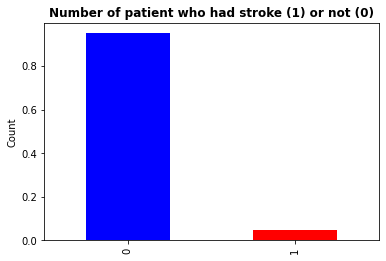

In [ ]:
#Count of patients
stroke_values = df_copy['stroke'].value_counts(normalize=True)
print('Number of patient had stroke (1) or not (0)')
print(stroke_values)
print('\n')
print('\n')
stroke_values.plot(kind = 'bar', color = ['blue','red'])
plt.title('Number of patient who had stroke (1) or not (0)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')
#plt.xlabel('0'='no stroke', '1'='stroke')
plt.show()


The dataset is unbalaced: 95% od patients did't have stroke and less than 5% of patients had a stroke



In [ ]:
# split the dataset in patients had stroke or not
df_stroke = df_copy.loc[df_copy['stroke']==1]
df_no_stroke = df_copy.loc[df_copy['stroke']==0]


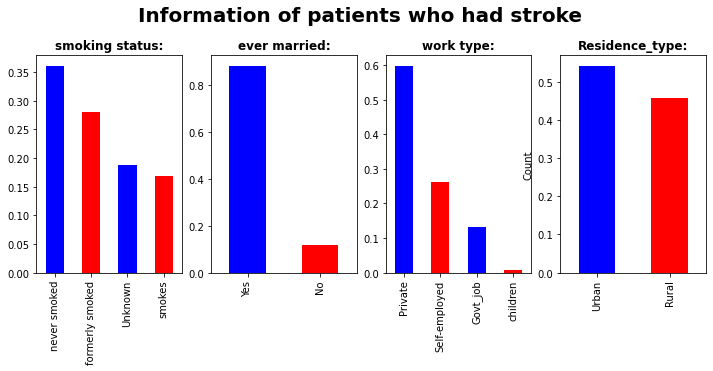

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize=(12,4))
smoking_status_values = df_stroke['smoking_status'].value_counts(normalize=True)
smoking_status_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[0])
axes[0].set_title('smoking status:', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')

ever_married_values = df_stroke['ever_married'].value_counts(normalize=True)
ever_married_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[1])
axes[1].set_title('ever married:', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')

work_type_values = df_stroke['work_type'].value_counts(normalize=True)
work_type_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[2])
axes[2].set_title('work type:', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')

Residence_type_values = df_stroke['Residence_type'].value_counts(normalize=True)
Residence_type_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[3])
axes[3].set_title('Residence type:', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')
fig.suptitle('Information of patients who had stroke', fontsize = 20, fontweight = 'bold', y = 1.05)
plt.show()





Patients who had stroke more than 35% never smoked and more than 25% formerly smoked. Most of these patients are married (more than 80%) and work in private jobs (about 60%). About 55% live in urban area and 45% in rural area. 


Gender of patient had stroke
Female    0.566265
Male      0.433735
Name: gender, dtype: float64


Gender of patient did not have stroke
Female    0.586916
Male      0.412878
Other     0.000206
Name: gender, dtype: float64




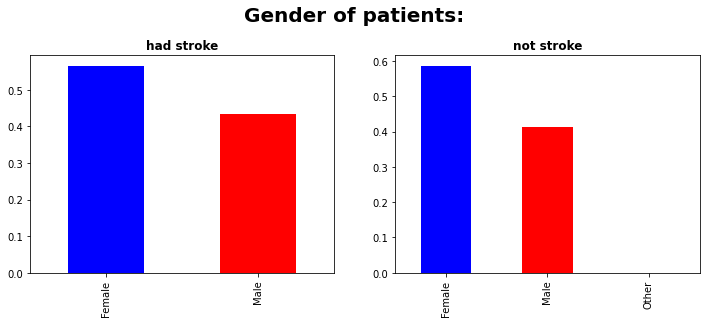

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
stroke_gender_values = df_stroke['gender'].value_counts(normalize=True)
print('Gender of patient had stroke')
print(stroke_gender_values)
print('\n')
stroke_gender_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[0])
axes[0].set_title('had stroke', fontsize = 12, fontweight = 'bold')

no_stroke_gender_values = df_no_stroke['gender'].value_counts(normalize=True)
print('Gender of patient did not have stroke')
print(no_stroke_gender_values)
print('\n')
no_stroke_gender_values.plot(kind = 'bar', color = ['blue','red'], ax=axes[1])
axes[1].set_title('not stroke',  fontsize = 12, fontweight = 'bold')
fig.suptitle('Gender of patients:', fontsize = 20, fontweight = 'bold', y = 1.05)
plt.show()

In both group there are more female (more than 55%) than male (about 40%)

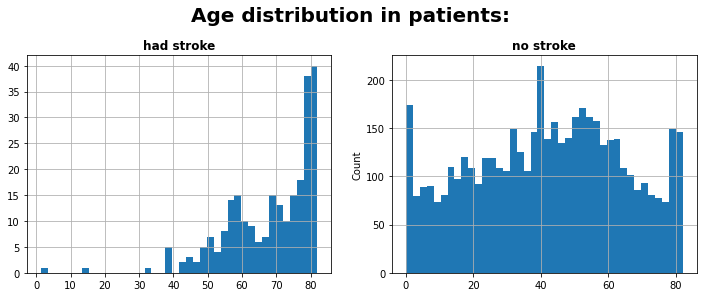

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
df_stroke['age'].hist(bins=40, ax=axes[0])
axes[0].set_title('had stroke', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count')

df_no_stroke['age'].hist(bins=40, ax=axes[1])
axes[1].set_title('no stroke',  fontsize = 12, fontweight = 'bold')
fig.suptitle('Age distribution in patients:', fontsize = 20, fontweight = 'bold', y = 1.05)
plt.show()
plt.show()

Most of patients who had stroke are older than 40 years old, in other group the age goes to 0 to 80 years old.  

hypertension in patients had stroke
0    0.73494
1    0.26506
Name: hypertension, dtype: float64


hypertension in patients no stroke
0    0.911129
1    0.088871
Name: hypertension, dtype: float64




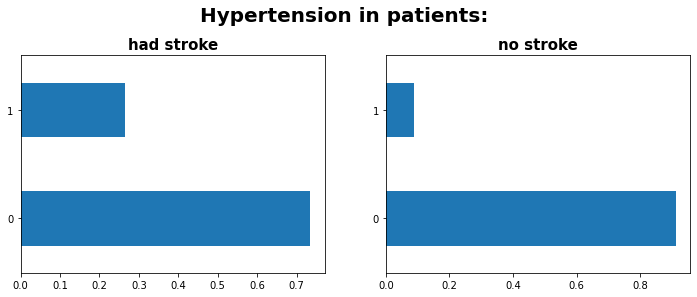

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
BP_df_stroke = df_stroke['hypertension'].value_counts(normalize=True)
print('hypertension in patients had stroke')
print(BP_df_stroke)
print('\n')

BP_df_stroke.plot(kind='barh', ax=axes[0])
axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')


BP_df_no_stroke = df_no_stroke['hypertension'].value_counts(normalize=True)
print('hypertension in patients no stroke')
print(BP_df_no_stroke)
print('\n')
BP_df_no_stroke.plot(kind='barh', ax=axes[1])
axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold')
fig.suptitle('Hypertension in patients:', fontsize = 20, fontweight = 'bold', y = 1.05)

plt.show()

In patients who had stroke more tha 25% have hypertension and in patients who didn't have stroke less than 10% have hypertension. 

heart_disease in patients had stroke
0    0.811245
1    0.188755
Name: heart_disease, dtype: float64


heart_disease in patients no stroke
0    0.95289
1    0.04711
Name: heart_disease, dtype: float64




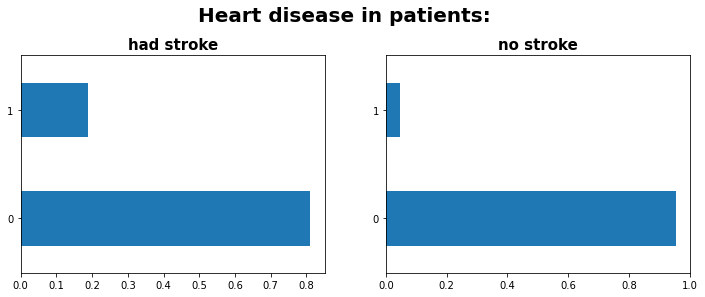

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
heart_df_stroke = df_stroke['heart_disease'].value_counts(normalize=True)
print('heart_disease in patients had stroke')
print(heart_df_stroke)
print('\n')

heart_df_stroke.plot(kind='barh', ax=axes[0])
axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')


heart_df_no_stroke = df_no_stroke['heart_disease'].value_counts(normalize=True)
print('heart_disease in patients no stroke')
print(heart_df_no_stroke)
print('\n')
heart_df_no_stroke.plot(kind='barh', ax=axes[1])
axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold')
fig.suptitle('Heart disease in patients:', fontsize = 20, fontweight = 'bold', y = 1.05)

plt.show()

In patients who had stroke about 20% have heart disease and in patients who didn't have stroke less than 5% have heart disease.

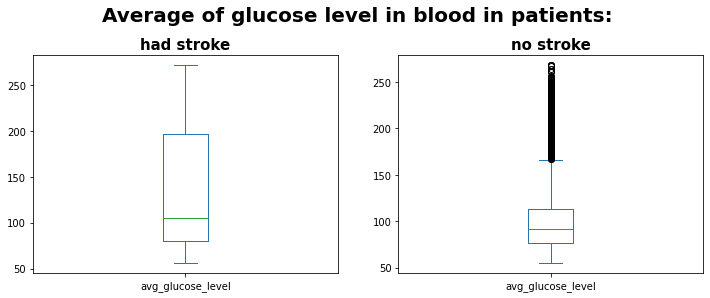

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
df_stroke['avg_glucose_level'].plot(kind='box', ax=axes[0])
axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')

df_no_stroke['avg_glucose_level'].plot(kind='box', ax=axes[1])
axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold')
fig.suptitle('Average of glucose level in blood in patients:', fontsize = 20, fontweight = 'bold', y = 1.05)
plt.show()

In patients who didn't have stroke there are more outliers in average of glucose level. The mean in patients who had stroke is higher (130) than in patients who didn't have (100). 

In [ ]:
df_stroke['avg_glucose_level'].describe()

count    249.000000
mean     132.544739
std       61.921056
min       56.110000
25%       79.790000
50%      105.220000
75%      196.710000
max      271.740000
Name: avg_glucose_level, dtype: float64

In [ ]:
df_no_stroke['avg_glucose_level'].describe()

count    4861.000000
mean      104.795513
std        43.846069
min        55.120000
25%        77.120000
50%        91.470000
75%       112.830000
max       267.760000
Name: avg_glucose_level, dtype: float64

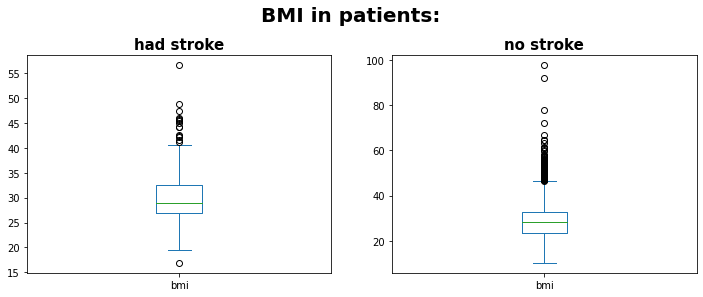

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
df_stroke['bmi'].plot(kind='box', ax=axes[0])
axes[0].set_title('had stroke', fontsize = 15, fontweight = 'bold')

df_no_stroke['bmi'].plot(kind='box', ax=axes[1])
axes[1].set_title('no stroke', fontsize = 15, fontweight = 'bold')
fig.suptitle('BMI in patients:', fontsize = 20, fontweight = 'bold', y = 1.05)
plt.show()

In [ ]:
df_stroke['bmi'].describe()

count    249.000000
mean      30.217789
std        5.825589
min       16.900000
25%       27.000000
50%       28.893237
75%       32.500000
max       56.600000
Name: bmi, dtype: float64

In [ ]:
df_no_stroke['bmi'].describe()

count    4861.000000
mean       28.825388
std         7.776203
min        10.300000
25%        23.600000
50%        28.300000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In patients who didn't have stroke there are more outliers in bmi. The max in patients who had stroke is 56 and in patients who didn't have the max is about 100. 